In [62]:
import pandas as pd
df = pd.read_csv('../data/steam_games.csv')

In [102]:
blue = "#1f77b4"

In [66]:
# Ta bort endast första plustecknet i varje rad i kolumnen 'Genre Tags'
df['Genre Tags'] = df['Genre Tags'].str.replace('+', '', n=1, regex=False)

# Visa resultatet
print(df['Genre Tags'])


0     FPS, Shooter, Multiplayer, Competitive, Action...
1     Survival, Shooter, Battle Royale, Multiplayer,...
2     Free to Play, MOBA, Multiplayer, Strategy, eSp...
3     Free to Play, Multiplayer, Hero Shooter, Third...
4     Action RPG, Hack and Slash, RPG, Action, Souls...
                            ...                        
95    Turn-Based Strategy, Strategy, Turn-Based, Mul...
96    Action, FPS, Multiplayer, Shooter, Classic, Te...
97    City Builder, Simulation, Building, Management...
98      Open World, Post-apocalyptic, Singleplayer, RPG
99    Free to Play, Survival, Zombies, Multiplayer, ...
Name: Genre Tags, Length: 100, dtype: object


In [67]:
# Dela upp 'Genre Tags' i en lista av genrer
df['Genre Tags'] = df['Genre Tags'].str.split()  # Om varje genre är separerad med ett mellanslag


In [68]:
# Explodera genrerna till separata rader
df_exploded = df.explode('Genre Tags')


In [69]:
# Räkna antalet förekomster per genre
genre_counts = df_exploded['Genre Tags'].value_counts()

# Visa resultatet
print(genre_counts)


Genre Tags
Multiplayer,     90
Action,          62
Open             58
Singleplayer,    54
World,           45
                 ..
Score             1
Attack,           1
1980s,            1
Assassin,         1
Nostalgia,        1
Name: count, Length: 316, dtype: int64


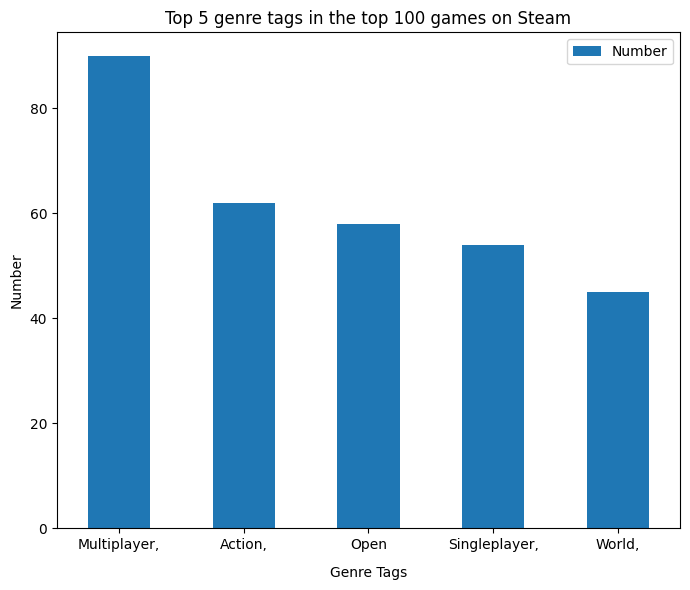

In [105]:
# Visualisera de 10 mest populära genrerna
import matplotlib.pyplot as plt
top_genres = genre_counts.head(5)

# Skapa en barplot
plt.figure(figsize=(7, 6))
top_genres.plot(kind='bar',width = 0.5 ,color=blue,label = 'Number')
plt.title('Top 5 genre tags in the top 100 games on Steam')
plt.xlabel('Genre Tags',labelpad = 10)
plt.ylabel('Number')
plt.legend()
plt.tick_params(axis='x', rotation=0)



plt.tight_layout()
plt.savefig('../plots/genre_tags2.png', dpi=300, bbox_inches='tight')
plt.show()
